In [1]:
# I'm really tired of duplicating notebook code, so I'm just gonna stick as much as I can in here

# first things first, import pandas and seaborn
import pandas as pd
from collections import defaultdict, OrderedDict

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# configure graph rendering for notebookness
%matplotlib inline
%pylab inline
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pylab.rcParams['figure.figsize'] = (14, 8)
plt.subplots_adjust(top=0.9)

# define our dynamic loader function
# function should take a formatting string that leads to the root directory, containing all subdirs of data

standard_base = "/home/jgf/git/Empirical/examples/evo/concept/nomap/"


def do_increment(curr, ceil):
    curr[len(curr)-1] += 1
    
    for i in range(len(curr) - 1, -1, -1):
        if curr[i] >= ceil[i]:
            if i > 0: # don't reset the first/most dignificant digit--needed for stop case
                curr[i - 1] += 1 # increment next digit
                curr[i] = 0      # reset current
                
    print("Now at state {} / {}".format(curr, ceil))
        
    

# OrderedDict([('z', [1, 2, 3]), ('y', [0, 9, 8]), ('a', ['b', 'c', 'd'])])

def get_the_goods(base_location, exp_name, factorization, num_replicates, structures):
    """
    Function to (theoretically) simplify the loading of experimental data
    
    exp_name: the foldername that the experiments live in
    
    base_location: root dir of diff experiments (e.g. /part/of/the/base, where experiment is /part/of/the/base/somexp)
    
    factorization: an ordered dictionary contianing the different settings swept; e.g.:
        {
            setting1: (a, b, c, d)
            setting2: (1, 2, 3, 4)
        }
        where the path looks like:
            someexp/setting1_a/setting2_1/replicate_num*.csv
    
    num_replicates: how many do you think you can catch, Deckard?
    
    structures: a list of the different binary names used
    """
    
    okeys = list(factorization.keys())
    ticker = [0 for i in range(0, len(okeys))]
    ceilings = [len(factorization[key]) for key in okeys]
    num_keys = len(factorization.keys())
    
    baseframe = None
    
    while ticker[0] < ceilings[0]:
        # build each treatment path
        
        tpath = ""
        for i in range(0, num_keys):
            try:
                tpath += okeys[i] + "_"  + str(factorization[okeys[i]][ticker[i]]) + "/"
            except Exception as err:
                print("Encountered error when processing config {}".format(ticker))
                print("Error: {}".format(err))
                break
        # wasn't that fun?
        
        # now load the individual replicants
        # and tag them with each of their treatments (the poor bastards)
        print("Loading {} x {}".format(tpath, num_replicates))
        for s in structures:
            for r in range(0, num_replicates):
                cpath = s + '-' + str(r) + '-quorum.csv'
                
                try:
                    
                    loaded = pd.read_csv(base_location + exp_name + '/' + tpath + cpath, sep=' ')
                    loaded['structure'] = s
                    loaded['replicate'] = r
                    
                    # assign all treatment fields
                    for i in range(0, num_keys):
                        loaded[okeys[i]] = str(factorization[okeys[i]][ticker[i]])
                        
                    if baseframe is None:
                        baseframe = loaded
                    else:
                        baseframe = pd.concat([baseframe, loaded])
                    
                except Exception as err:
                    print("Error when loading {} {}".format(tpath, cpath))
                    print("Error is: {}".format(err))
                    continue
        
        do_increment(ticker, ceilings)
        
    return baseframe    

Populating the interactive namespace from numpy and matplotlib


Loading SUBGRID_SIZE_5/ x 10
Now at state [1] / [5]
Loading SUBGRID_SIZE_10/ x 10
Now at state [2] / [5]
Loading SUBGRID_SIZE_15/ x 10
Now at state [3] / [5]
Loading SUBGRID_SIZE_20/ x 10
Now at state [4] / [5]
Loading SUBGRID_SIZE_30/ x 10
Now at state [5] / [5]


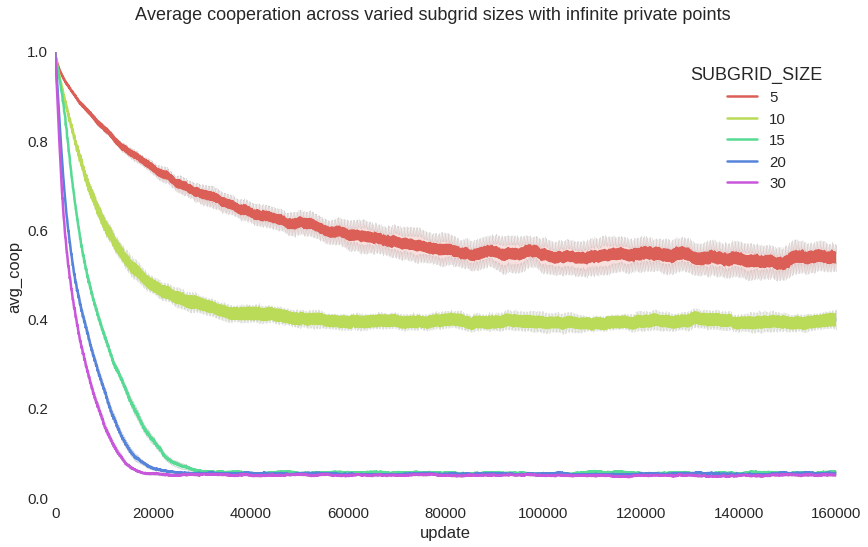

In [2]:
## test using subgrid size sweep

# testing
test_fact = OrderedDict([('SUBGRID_SIZE', [5, 10, 15, 20, 30])])
data = get_the_goods(standard_base, 'grid-pools-infinite-private-pts', test_fact, 10, ['grid-pools-quorum.out'])
sns.plt.suptitle("Average cooperation across varied subgrid sizes with infinite private points")
ax = sns.tsplot( time="update", value="avg_coop", unit="replicate", 
    condition="SUBGRID_SIZE", ci=95, data=data, color="hls")
ax.patch.set_visible(False)

Loading BOTTLENECK_SPACING_5/ x 10
Now at state [1] / [13]
Loading BOTTLENECK_SPACING_10/ x 10
Now at state [2] / [13]
Loading BOTTLENECK_SPACING_15/ x 10
Now at state [3] / [13]
Loading BOTTLENECK_SPACING_20/ x 10
Now at state [4] / [13]
Loading BOTTLENECK_SPACING_25/ x 10
Now at state [5] / [13]
Loading BOTTLENECK_SPACING_30/ x 10
Now at state [6] / [13]
Loading BOTTLENECK_SPACING_35/ x 10
Now at state [7] / [13]
Loading BOTTLENECK_SPACING_40/ x 10
Now at state [8] / [13]
Loading BOTTLENECK_SPACING_45/ x 10
Now at state [9] / [13]
Loading BOTTLENECK_SPACING_50/ x 10
Now at state [10] / [13]
Loading BOTTLENECK_SPACING_100/ x 10
Now at state [11] / [13]
Loading BOTTLENECK_SPACING_200/ x 10
Now at state [12] / [13]
Loading BOTTLENECK_SPACING_300/ x 10
Now at state [13] / [13]


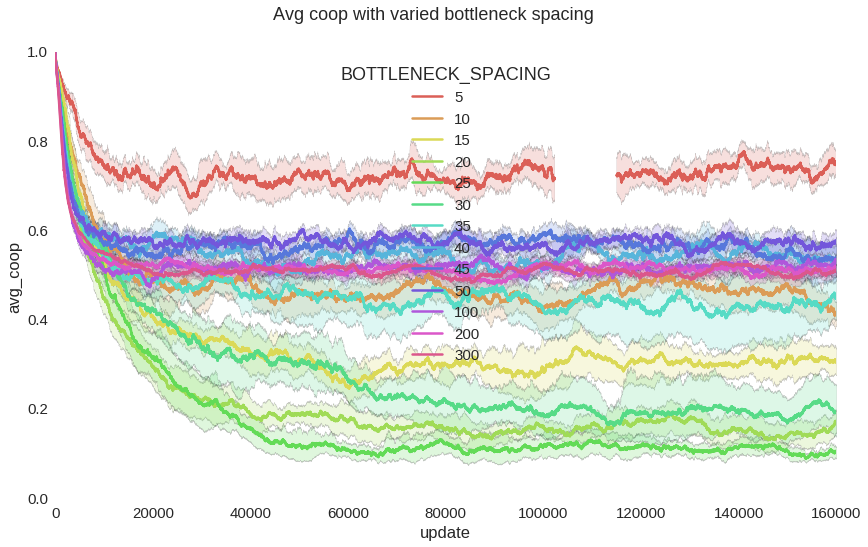

In [3]:
test_fact = OrderedDict([('BOTTLENECK_SPACING', [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 200, 300])])
data = get_the_goods(standard_base, 'bottleneck-spacing-sweep', test_fact, 10, ['standard-grid-quorum.out'])
sns.plt.suptitle("Avg coop with varied bottleneck spacing")
ax = sns.tsplot( time="update", value="avg_coop", unit="replicate", 
    condition="BOTTLENECK_SPACING", ci=95, data=data, color="hls")
ax.patch.set_visible(False)

In [4]:
threshoptions = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8']
fact = OrderedDict([('HI_AI_WEIGHT', threshoptions),
                    ('LO_AI_WEIGHT', threshoptions)])
data = get_the_goods(standard_base, 'standard-grid-60x60-AI-sweep', fact, 10, ['standard-grid-quorum.out'])
data.head()

Loading HI_AI_WEIGHT_0.1/LO_AI_WEIGHT_0.1/ x 10
Now at state [0, 1] / [8, 8]
Loading HI_AI_WEIGHT_0.1/LO_AI_WEIGHT_0.2/ x 10
Now at state [0, 2] / [8, 8]
Loading HI_AI_WEIGHT_0.1/LO_AI_WEIGHT_0.3/ x 10
Now at state [0, 3] / [8, 8]
Loading HI_AI_WEIGHT_0.1/LO_AI_WEIGHT_0.4/ x 10
Now at state [0, 4] / [8, 8]
Loading HI_AI_WEIGHT_0.1/LO_AI_WEIGHT_0.5/ x 10
Now at state [0, 5] / [8, 8]
Loading HI_AI_WEIGHT_0.1/LO_AI_WEIGHT_0.6/ x 10
Now at state [0, 6] / [8, 8]
Loading HI_AI_WEIGHT_0.1/LO_AI_WEIGHT_0.7/ x 10
Now at state [0, 7] / [8, 8]
Loading HI_AI_WEIGHT_0.1/LO_AI_WEIGHT_0.8/ x 10
Now at state [1, 0] / [8, 8]
Loading HI_AI_WEIGHT_0.2/LO_AI_WEIGHT_0.1/ x 10
Now at state [1, 1] / [8, 8]
Loading HI_AI_WEIGHT_0.2/LO_AI_WEIGHT_0.2/ x 10
Now at state [1, 2] / [8, 8]
Loading HI_AI_WEIGHT_0.2/LO_AI_WEIGHT_0.3/ x 10
Now at state [1, 3] / [8, 8]
Loading HI_AI_WEIGHT_0.2/LO_AI_WEIGHT_0.4/ x 10
Now at state [1, 4] / [8, 8]
Loading HI_AI_WEIGHT_0.2/LO_AI_WEIGHT_0.5/ x 10
Now at state [1, 5] / [8, 8]

,update,avg_age,max_age,avg_coop,avg_points,percentlying_defector,percentdonator,grid_usage,available_private_pts,structure,replicate,HI_AI_WEIGHT,LO_AI_WEIGHT
0,0,0.00000,0,1.000000,0.0000,0,1,0.100000,75000,standard-grid-quorum.out,0,0.1,0.1
1,10,10.00000,10,1.000000,10.0000,0,1,0.095833,71895,standard-grid-quorum.out,0,0.1,0.1
2,20,20.00000,20,1.000000,20.0000,0,1,0.095833,68445,standard-grid-quorum.out,0,0.1,0.1
3,30,3.93120,30,0.997678,8.9280,0,1,0.173611,64019,standard-grid-quorum.out,0,0.1,0.1
4,40,8.47552,40,0.995997,17.2526,0,1,0.215556,57123,standard-grid-quorum.out,0,0.1,0.1


In [ ]:
threshoptions = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8']
for parent in threshoptions:
    sns.plt.suptitle("Avg coop with Lo AI {} and hi varied".format(parent))
    sample = data[data['LO_AI_WEIGHT'] == parent]
    print("Graphing {}, which is {} long".format(parent, len(sample)))
    sns.tsplot( time="update", value="avg_coop", unit="replicate", 
        condition="HI_AI_WEIGHT", data=sample, color="hls", ci=95)
    savefig("Lo_{}.png".format(parent))
    plt.clf()
    print("Graphsed and saved Lo_{}.png".format(parent))

Graphing 0.1, which is 2560000 long
